# Regression Models: Without GNI Growth %
### Predicting GDP Annual Change.
---
Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

In [19]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

Read in Data

In [20]:
df = pd.read_csv('../../data/data_feat_engin.csv')

Look at columns for features.

In [21]:
df.columns

Index(['Year', 'Country', 'Refugees under UNHCR's mandate', 'Asylum-seekers',
       'IDPs of concern to UNHCR', 'Stateless persons', 'Others of concern',
       'Ref and Asyl', 'SUM REFUGEE', 'GDP_annual_change',
       'Adjusted savings: net national savings (current US$)',
       'Adjusted savings: particulate emission damage (current US$)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Air transport, passengers carried',
       'Current health expenditure (% of GDP)',
       'Current health expenditure per capita (current US$)',
       'Death rate, crude (per 1,000 people)',
       'Domestic general government health expenditure per capita (current US$)',
       'Domestic private health expenditure per capita (current US$)',
       'Ease of doing business score (0 = lowest performance to 100 = best performance)',
       'Fixed broadband subscriptions (per 100 people)',
       'Fixed telephone subscriptions (per 100 people)',
       'GNI growth (ann

## Null Model - GDP Annual Change
---

In [22]:
df['base'] = df['GDP_annual_change'].mean()
RMSE = np.sqrt(metrics.mean_squared_error(df['GDP_annual_change'], df['base']))
RMSE

2.4666729263695077

The Baseline model has a Root Mean Squared Error of 2.47%. On average the predicted GDP Annual Change is about \\2.47% off from the true sales price.

## Regression Pipelines
---
Will first look at all columns, not including feature engineering, and feed into a function for the various regression models. Interpretability will be important with this project, so it will be necessary to keep that in mind as a model is chosen to move forward.

In [23]:
features = ["Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Stateless persons', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Air transport, passengers carried',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Death rate, crude (per 1,000 people)',
            'Domestic general government health expenditure per capita (current US$)',
            'Domestic private health expenditure per capita (current US$)',
            'Ease of doing business score (0 = lowest performance to 100 = best performance)',
            'Fixed broadband subscriptions (per 100 people)',
            'Fixed telephone subscriptions (per 100 people)',
            #'GNI growth (annual %)',
            'International tourism, expenditures (current US$)',
            'International tourism, receipts (current US$)',
            'Military expenditure (current USD)', 'Population growth (annual %)',
            'Prevalence of undernourishment (% of population)',
            'Refugee population by country or territory of asylum',
            'Strength of legal rights index (0=weak to 12=strong)',
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Net official flows from UN agencies: Total'
           ]

In [24]:
X = df[features]
y = df['GDP_annual_change']

In [25]:
def modelfunc(X, y):
    pipelines = [
        ('LINEAR REGRESSION', (Pipeline([ ('LR', LinearRegression())]))),
        ('DECISION TREE', (Pipeline([ ('TREE', DecisionTreeRegressor())]))),
        ('BAGGED TREE', (Pipeline([ ('BAG', BaggingRegressor())]))),
        ('RANDOM FOREST', (Pipeline([ ('RAND', RandomForestRegressor())]))),
        ('ADABOOST', (Pipeline([ ('ADA', AdaBoostRegressor())]))),
        ('KNN', (Pipeline([ ('sc', StandardScaler()),('KNN', KNeighborsRegressor())]))),
        ('LASSO',(Pipeline([ ('sc', StandardScaler()),('LASSO', LassoCV())]))),
        ('RIDGE',(Pipeline([ ('sc', StandardScaler()),('RIDGE', RidgeCV())])))
    ]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 
    for pipe_name ,model in pipelines:
        print(pipe_name)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        trainscore = model.score(X_train, y_train)
        testscore = model.score(X_test, y_test)
        crossval = cross_val_score(model, X_train, y_train).mean()
        rmsetr= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        rmsete = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        print (f'Model = {model}')
        print (f'Train Score = {trainscore}')
        print (f'Test Score = {testscore}')
        print (f'Cross Val Score = {crossval}')
        print (f'RMSE Train = {rmsetr}')
        print (f'RMSE Test = {rmsete}')
        print('')
        print('')

In [26]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.28333765598937344
Test Score = 0.09403075599363508
Cross Val Score = 0.10421664459004727
RMSE Train = 1.9777896062938318
RMSE Test = 2.6841884741888844


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = 0.17016709853504353
Cross Val Score = 0.046606699146475326
RMSE Train = 8.176345093409794e-17
RMSE Test = 2.5689260630969257


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.8996752626615067
Test Score = 0.40529457805339686
Cross Val Score = 0.3108671552905137
RMSE Train = 0.7399916395632831
RMSE Test = 2.1747394313604382


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9196681791401649
Test Score = 0.44730712613118684
Cross Val Score = 0.37362707748927615
RMSE Train = 0.662165581525983
RMSE Test = 2.0965161512768584


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoostRe

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7234547268338929, tolerance: 0.12799594245441753
  model = cd_fast.enet_coordinate_descent_gram(


Model = Pipeline(steps=[('sc', StandardScaler()), ('LASSO', LassoCV())])
Train Score = 0.2481938611959582
Test Score = 0.09865353894534701
Cross Val Score = 0.15860825624261046
RMSE Train = 2.0257028130740005
RMSE Test = 2.677331569243743


RIDGE
Model = Pipeline(steps=[('sc', StandardScaler()),
                ('RIDGE', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])
Train Score = 0.28170795674232274
Test Score = 0.09968529121614844
Cross Val Score = 0.12967756061738864
RMSE Train = 1.980037088625605
RMSE Test = 2.6757987880118224




### Random Forest performed the best according to the function above. Dig into it with some tuning below.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

rand = RandomForestRegressor()
# rand.fit(X_train, y_train)

params = {
    'n_estimators': [75, 100, 125, 150, 175, 200],
    'max_depth': [None, 3, 4, 5], 
    'max_features': ['auto', 'sqrt', 3, 4, 5]
}
gs = GridSearchCV(RandomForestRegressor(), 
                 param_grid = params, 
                 verbose = 1)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.3897229803444521
{'max_depth': None, 'max_features': 3, 'n_estimators': 150}


In [28]:
rand = RandomForestRegressor(max_depth=None, max_features=3, n_estimators = 150)
rand.fit(X_train, y_train)
y_pred_train = rand.predict(X_train)
y_pred_test = rand.predict(X_test)
trainscore = rand.score(X_train, y_train)
testscore = rand.score(X_test, y_test)
crossval = cross_val_score(rand, X_train, y_train).mean()
rmsetr= np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmsete = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print (f'Train Score = {trainscore}')
print (f'Test Score = {testscore}')
print (f'Cross Val Score = {crossval}')
print (f'RMSE Train = {rmsetr}')
print (f'RMSE Test = {rmsete}')

Train Score = 0.9212280743688364
Test Score = 0.41608502319038
Cross Val Score = 0.3865217132029092
RMSE Train = 0.6557050500826503
RMSE Test = 2.1549196793250767


In [31]:
feat_imp = pd.DataFrame(rand.feature_importances_, 
          index=X_train.columns)
feat_imp.columns = ['Relative Importance']
feat_imp.sort_values('Relative Importance', ascending = False)

,Relative Importance
Current health expenditure per capita (current US$),0.062450
Domestic general government health expenditure per capita (current US$),0.059752
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0.056870
Domestic private health expenditure per capita (current US$),0.053132
Current health expenditure (% of GDP),0.048200
Net official flows from UN agencies: Total,0.043931
"Air transport, passengers carried",0.037858
"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.036261
Adjusted savings: net national savings (current US$),0.036065
"Death rate, crude (per 1,000 people)",0.035216


In [32]:
feat_imp['Relative Importance'].sum()

1.0

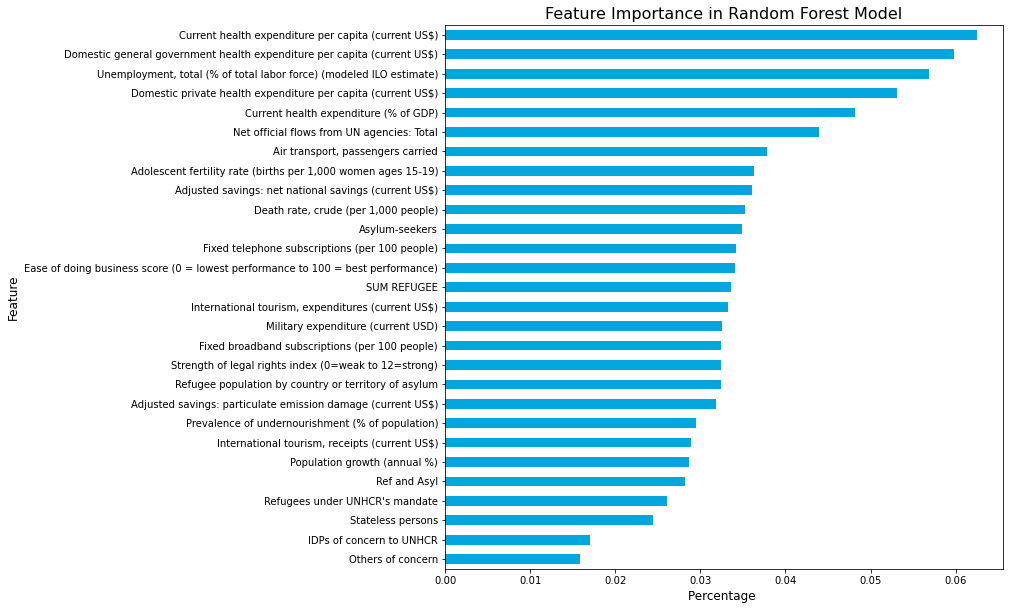

In [33]:
plt.rcParams["figure.figsize"]=(10,10)
feat_imp.sort_values('Relative Importance', ascending = True).plot(kind='barh',
             legend = None, 
             color = '#04a7dd')
plt.title('Feature Importance in Random Forest Model', fontdict = {'fontsize': 16})
plt.xlabel('Percentage ', fontdict = {'fontsize': 12})
plt.yticks(fontsize = 10)
plt.ylabel('Feature', fontdict = {'fontsize': 12});
plt.savefig("../../images/feat_imp.jpg", bbox_inches="tight", dpi=100);

## Below Changing features and running through the same function.
---
Adding engineered features.

In [11]:
features_1 = ["Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Stateless persons', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Air transport, passengers carried',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Death rate, crude (per 1,000 people)',
            'Domestic general government health expenditure per capita (current US$)',
            'Domestic private health expenditure per capita (current US$)',
            'Ease of doing business score (0 = lowest performance to 100 = best performance)',
            'Fixed broadband subscriptions (per 100 people)',
            'Fixed telephone subscriptions (per 100 people)',
            #'GNI growth (annual %)',
            'International tourism, expenditures (current US$)',
            'International tourism, receipts (current US$)',
            'Military expenditure (current USD)', 'Population growth (annual %)',
            'Prevalence of undernourishment (% of population)',
            'Refugee population by country or territory of asylum',
            'Strength of legal rights index (0=weak to 12=strong)',
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Net official flows from UN agencies: Total', 
            'Intl tourism expenditures recipts and asylum seekers', 
            'Intl tourism expenditures receipts and military',
            'net inflows UN and refugee pop', 
            'SUM REFUGEE and undernourishment'
           ]

In [12]:
X = df[features_1]
y = df['GDP_annual_change']

In [13]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.002557638906477644
Test Score = -0.017215223763378917
Cross Val Score = -0.010641886204069539
RMSE Train = 2.3332791579773127
RMSE Test = 2.844216854015721


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = 0.12291737794504265
Cross Val Score = -0.058887805672292126
RMSE Train = 8.176345093409794e-17
RMSE Test = 2.641049451565579


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.8866088349926499
Test Score = 0.40818218458176525
Cross Val Score = 0.33325879086022525
RMSE Train = 0.7867058979318995
RMSE Test = 2.1694532568691747


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9168788327508259
Test Score = 0.4397110102190146
Cross Val Score = 0.36064535812306076
RMSE Train = 0.6735636071250936
RMSE Test = 2.1108740653653215


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBo

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2350063702533589, tolerance: 0.1843440793564725
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3147059347429604, tolerance: 0.1843440793564725
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.318007372011607, tolerance: 0.1843440793564725
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/li

Model = Pipeline(steps=[('sc', StandardScaler()), ('LASSO', LassoCV())])
Train Score = 0.24896890480717382
Test Score = 0.09882206268219895
Cross Val Score = 0.14342213276581317
RMSE Train = 2.0246583863362155
RMSE Test = 2.677081268703321


RIDGE
Model = Pipeline(steps=[('sc', StandardScaler()),
                ('RIDGE', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])
Train Score = 0.30552777779760854
Test Score = 0.08980921953228815
Cross Val Score = 0.110079385343121
RMSE Train = 1.946929551291197
RMSE Test = 2.6904349500205527




Again, the Random Forest is performing the best. 

## Changing Features again to look at those with the highest correlation.
---

In [14]:
features_2 = ['Stateless persons',
            #'GNI growth (annual %)', 
            'Strength of legal rights index (0=weak to 12=strong)',
            'Adjusted savings: net national savings (current US$)',
            'Adjusted savings: particulate emission damage (current US$)',
            'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Population growth (annual %)', 
            'Unemployment, total (% of total labor force) (modeled ILO estimate)',
            'Fixed telephone subscriptions (per 100 people)',
            'Current health expenditure (% of GDP)',
            'Current health expenditure per capita (current US$)',
            'Domestic general government health expenditure per capita (current US$)',
            'Fixed broadband subscriptions (per 100 people)',
            'Domestic private health expenditure per capita (current US$)',
            'International tourism, expenditures (current US$)',
            "Refugees under UNHCR's mandate", 
            'Asylum-seekers',
            'IDPs of concern to UNHCR', 
            'Others of concern',
            'Ref and Asyl', 
            'SUM REFUGEE',
            'Intl tourism expenditures recipts and asylum seekers', 
            'Intl tourism expenditures receipts and military',
            'net inflows UN and refugee pop', 
            'SUM REFUGEE and undernourishment'
           ]

In [15]:
X = df[features_2]
y = df['GDP_annual_change']

In [16]:
modelfunc(X, y)

LINEAR REGRESSION
Model = Pipeline(steps=[('LR', LinearRegression())])
Train Score = 0.002557638906477644
Test Score = -0.017215223763378473
Cross Val Score = -0.010641886204069317
RMSE Train = 2.3332791579773127
RMSE Test = 2.8442168540157207


DECISION TREE
Model = Pipeline(steps=[('TREE', DecisionTreeRegressor())])
Train Score = 1.0
Test Score = -0.011447046881560397
Cross Val Score = -0.1085453265068379
RMSE Train = 8.463321225389914e-17
RMSE Test = 2.8361412425768258


BAGGED TREE
Model = Pipeline(steps=[('BAG', BaggingRegressor())])
Train Score = 0.8773907848344398
Test Score = 0.3859923260549917
Cross Val Score = 0.2705315856200031
RMSE Train = 0.8180584851663246
RMSE Test = 2.2097501878627943


RANDOM FOREST
Model = Pipeline(steps=[('RAND', RandomForestRegressor())])
Train Score = 0.9127372291267083
Test Score = 0.4454577962133329
Cross Val Score = 0.33655077400869293
RMSE Train = 0.6901401548469617
RMSE Test = 2.100020730736255


ADABOOST
Model = Pipeline(steps=[('ADA', AdaBoo

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.32918707809994885, tolerance: 0.1339960074706062
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9544345978961246, tolerance: 0.1339960074706062
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1792525521805146, tolerance: 0.1339960074706062
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/

Model = Pipeline(steps=[('sc', StandardScaler()), ('LASSO', LassoCV())])
Train Score = 0.27047858056760665
Test Score = 0.10133481841831438
Cross Val Score = 0.12355781359383611
RMSE Train = 1.995454462016086
RMSE Test = 2.6733464086350263


RIDGE
Model = Pipeline(steps=[('sc', StandardScaler()),
                ('RIDGE', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])
Train Score = 0.28665639966911804
Test Score = 0.09192004991823433
Cross Val Score = 0.14317049393095002
RMSE Train = 1.9732048856125526
RMSE Test = 2.687313435074211




Again, Random Forest produces the best results. However, the best cross val score was from the first regression pipeline. Which is why the Feature Importance graph was created there. 

## Predictions for Ukrianian Asylum Countries

In [34]:
pred_df = pd.read_csv('../../data/to_predict.csv')
pred_df.drop(columns='Unnamed: 0', inplace=True)
pred_df.head()

,Year,Country,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,Ref and Asyl,SUM REFUGEE,Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (current US$),"Air transport, passengers carried",Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)",Ease of doing business score (0 = lowest performance to 100 = best performance),GNI growth (annual %),"International tourism, receipts (current US$)",Military expenditure (current USD),Population growth (annual %),Strength of legal rights index (0=weak to 12=strong),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Domestic general government health expenditure per capita (current US$),Domestic private health expenditure per capita (current US$),Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people),"International tourism, expenditures (current US$)",Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,Net official flows from UN agencies: Total,Intl tourism expenditures recipts and asylum seekers,Intl tourism expenditures receipts and military,net inflows UN and refugee pop,SUM REFUGEE and undernourishment
0,2022,Poland,2083854,0,0,0,0,2083854,2083854,4.416168e+10,8.806712e+08,8094182.25,6.467334,928.956207,10.625,77.213015,4.372740,1.428200e+10,1.071542e+10,-0.013783,7.0,4.5450,10.3536,660.872889,282.860393,20.325415,18.771959,9.790500e+09,2.5,12360.0,0.0,0.0,1.498316e+30,0.0,5209635.0
1,2022,Romania,535461,0,0,0,0,535461,535461,6.591602e+09,3.480326e+08,4662177.75,5.364822,614.267609,13.375,72.934697,5.052264,3.536500e+09,3.809572e+09,-0.566494,9.0,4.7325,35.8730,491.920694,129.212942,25.143476,19.277894,5.532000e+09,2.5,3885.5,0.0,0.0,7.453016e+28,0.0,1338652.5
2,2022,Hungary,312120,0,0,0,0,312120,312120,1.537801e+10,2.405017e+08,29624119.50,6.661884,1009.101074,13.300,72.680193,4.420212,8.943000e+09,1.648573e+09,-0.183254,9.0,4.1000,24.1273,697.982931,319.514078,31.055118,31.856395,3.144000e+09,2.5,5710.5,0.0,0.0,4.635258e+28,0.0,780300.0
3,2022,Slovakia,250036,0,0,0,0,250036,250036,4.725066e+09,1.113408e+08,2029542.25,6.886357,1251.663879,9.825,75.303210,2.573039,3.126000e+09,1.287655e+09,0.139484,7.0,7.5225,25.8096,984.866270,259.688334,26.719789,13.591184,2.705000e+09,4.3,951.5,0.0,0.0,1.088819e+28,0.0,1075154.8
4,2022,Russian Federation,231764,0,0,0,0,231764,231764,2.227500e+11,2.283782e+09,93754293.25,5.413075,576.749084,13.700,76.841657,1.592733,1.593250e+10,6.574222e+10,0.053620,8.5,5.0300,20.1593,346.511800,247.828844,21.686631,21.307699,3.718750e+10,2.5,101701.5,0.0,0.0,3.895160e+31,0.0,579410.0


In [35]:
pred_test = rand.predict(pred_df[features])

In [36]:
pred_test.shape

(6,)

In [38]:
pred_df['GDP Annual Change'] = pred_test

In [39]:
pred_df

,Year,Country,Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Stateless persons,Others of concern,Ref and Asyl,SUM REFUGEE,Adjusted savings: net national savings (current US$),Adjusted savings: particulate emission damage (current US$),"Air transport, passengers carried",Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Death rate, crude (per 1,000 people)",Ease of doing business score (0 = lowest performance to 100 = best performance),GNI growth (annual %),"International tourism, receipts (current US$)",Military expenditure (current USD),Population growth (annual %),Strength of legal rights index (0=weak to 12=strong),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Domestic general government health expenditure per capita (current US$),Domestic private health expenditure per capita (current US$),Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people),"International tourism, expenditures (current US$)",Prevalence of undernourishment (% of population),Refugee population by country or territory of asylum,Net official flows from UN agencies: Total,Intl tourism expenditures recipts and asylum seekers,Intl tourism expenditures receipts and military,net inflows UN and refugee pop,SUM REFUGEE and undernourishment,GDP Annual Change
0,2022,Poland,2083854,0,0,0,0,2083854,2083854,4.416168e+10,8.806712e+08,8094182.25,6.467334,928.956207,10.625,77.213015,4.372740,1.428200e+10,1.071542e+10,-0.013783,7.0,4.5450,10.3536,660.872889,282.860393,20.325415,18.771959,9.790500e+09,2.5,12360.0,0.000000e+00,0.0,1.498316e+30,0.000000e+00,5209635.0,3.366897
1,2022,Romania,535461,0,0,0,0,535461,535461,6.591602e+09,3.480326e+08,4662177.75,5.364822,614.267609,13.375,72.934697,5.052264,3.536500e+09,3.809572e+09,-0.566494,9.0,4.7325,35.8730,491.920694,129.212942,25.143476,19.277894,5.532000e+09,2.5,3885.5,0.000000e+00,0.0,7.453016e+28,0.000000e+00,1338652.5,3.410381
2,2022,Hungary,312120,0,0,0,0,312120,312120,1.537801e+10,2.405017e+08,29624119.50,6.661884,1009.101074,13.300,72.680193,4.420212,8.943000e+09,1.648573e+09,-0.183254,9.0,4.1000,24.1273,697.982931,319.514078,31.055118,31.856395,3.144000e+09,2.5,5710.5,0.000000e+00,0.0,4.635258e+28,0.000000e+00,780300.0,3.743343
3,2022,Slovakia,250036,0,0,0,0,250036,250036,4.725066e+09,1.113408e+08,2029542.25,6.886357,1251.663879,9.825,75.303210,2.573039,3.126000e+09,1.287655e+09,0.139484,7.0,7.5225,25.8096,984.866270,259.688334,26.719789,13.591184,2.705000e+09,4.3,951.5,0.000000e+00,0.0,1.088819e+28,0.000000e+00,1075154.8,3.054826
4,2022,Russian Federation,231764,0,0,0,0,231764,231764,2.227500e+11,2.283782e+09,93754293.25,5.413075,576.749084,13.700,76.841657,1.592733,1.593250e+10,6.574222e+10,0.053620,8.5,5.0300,20.1593,346.511800,247.828844,21.686631,21.307699,3.718750e+10,2.5,101701.5,0.000000e+00,0.0,3.895160e+31,0.000000e+00,579410.0,2.449776
5,2022,Belarus,3765,0,0,0,0,3765,3765,5.978325e+09,1.047708e+08,2629679.00,5.764656,345.642891,12.675,73.711263,1.530093,1.163625e+09,6.753116e+08,-0.109418,2.5,5.1025,14.1293,239.094725,102.188127,33.671118,47.551795,1.126000e+09,2.5,2190.0,3.236841e+06,0.0,8.848215e+26,7.088681e+09,9412.5,2.378090


In [46]:
pred_df[['Country', 
           "Refugees under UNHCR's mandate",
          'GDP Annual Change']]

,Country,Refugees under UNHCR's mandate,GDP Annual Change
0,Poland,2083854,3.366897
1,Romania,535461,3.410381
2,Hungary,312120,3.743343
3,Slovakia,250036,3.054826
4,Russian Federation,231764,2.449776
5,Belarus,3765,2.378090
